# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [19]:
import pandas as pd
import numpy as np

# 1. Airbnb Price
# Price is a string with $ and commas and commas appear once prices exceed 999.
# Remove $ and , so it converts to numeric

airbnb = pd.read_csv("airbnb_hw.csv")

airbnb["Price"] = (
    airbnb["Price"]
    .astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .replace("nan", np.nan)
    .astype(float)
)

print("Airbnb Price missing values:", airbnb["Price"].isna().sum())


# 2. MN police subject_injury
# Clean to yes or no and leave missing as NaN.
# A large share of values are missing which is concerning.

mn = pd.read_csv("mn_police_use_of_force.csv")

mn["subject_injury"] = mn["subject_injury"].replace({
    "Y": "Yes", "N": "No",
    "YES": "Yes", "NO": "No",
    "yes": "Yes", "no": "No"
})

print("MN subject_injury missing proportion:",
      mn["subject_injury"].isna().mean())

print(pd.crosstab(mn["force_type"], mn["subject_injury"], dropna=False))


# 3. Pretrial release dummy
# This should be a binary variable.
# Placeholder values are replaced with np.nan.

justice = pd.read_parquet("justice_data.parquet")

justice["WhetherDefendantWasReleasedPretrial"] = justice[
    "WhetherDefendantWasReleasedPretrial"
].replace(["", "Unknown", "UNK", "NA", "N/A"], np.nan)

print("Pretrial release missing values:",
      justice["WhetherDefendantWasReleasedPretrial"].isna().sum())


# 4. Imposed sentence (missing not at random)
# If the case was dismissed or not convicted, there should be no sentence.
# Missing values in those cases are expected and set to NaN.

mask_no_sentence = justice[
    "SentenceTypeAllChargesAtConvictionInContactEvent"
].isin(["Dismissed", "Not Convicted", "Nolle Prosequi", "Acquitted"])

justice.loc[mask_no_sentence, "ImposedSentenceAllChargeInContactEvent"] = np.nan

print("Imposed sentence missing values:",
      justice["ImposedSentenceAllChargeInContactEvent"].isna().sum())


Airbnb Price missing values: 0
MN subject_injury missing proportion: 0.7619342359767892
subject_injury                 No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985
Pretrial release missing values: 0
Imposed sentence missing values: 0


shape: (7070, 23)
after drop: (7070, 21)

year range: 0.0 to 2026.0
rows: 5534
slope: 0.9465
increasing


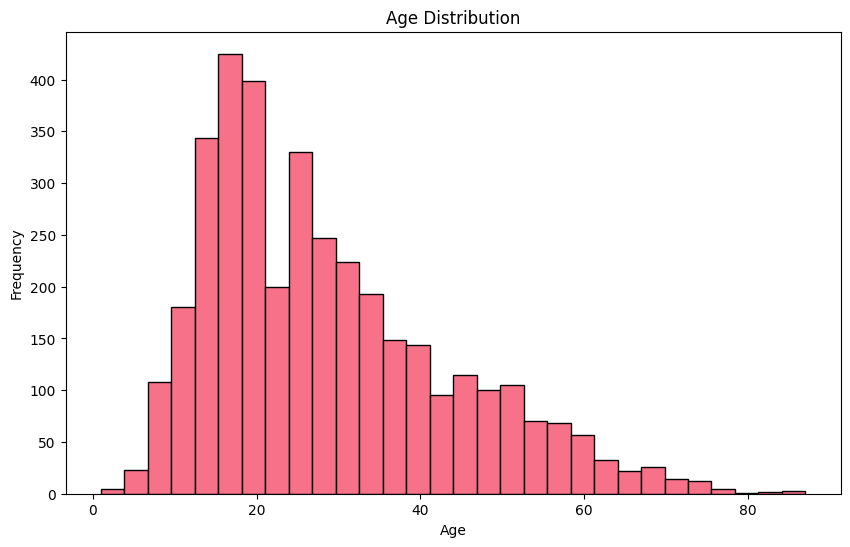


prop male: 0.857
prop unprovoked: 0.745

unprovoked - male: 84.5%, female: 15.5%
basically same as overall proportions so no preference
Provoked: 2.5% fatal
Unprovoked: 17.1% fatal
unprovoked way more fatal
male: 16.5% fatal
female: 13.8% fatal
males slightly higher

To me, they're like any other animal. It's in their nature to be aggressive and not their fault for attacks. People should be aware before putting the blame on the animal.

white sharks: 0.121 (12.1%)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# load the data
df = pd.read_excel('GSAF5.xls')
print(f"shape: {df.shape}")

# drop empty columns
df = df.dropna(axis=1, how='all')
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
print(f"after drop: {df.shape}")

# clean year
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print(f"\nyear range: {df['Year'].min()} to {df['Year'].max()}")

# filter 1940+
df = df[df['Year'] >= 1940].copy()
print(f"rows: {len(df)}")

# check if increasing
yearly = df.groupby('Year').size()
slope, intercept, r, p, stderr = stats.linregress(yearly.index, yearly.values)
print(f"slope: {slope:.4f}")
if slope > 0.5:
    print("increasing")
elif slope < -0.5:
    print("decreasing")
else:
    print("constant")

# age cleaning - this is messy lol
def clean_age(age):
    if pd.isna(age):
        return np.nan
    age_str = str(age).strip().lower()

    # ranges like "20 to 25"
    if 'to' in age_str or '-' in age_str:
        nums = [int(s) for s in age_str.replace('to', ' ').replace('-', ' ').split() if s.isdigit()]
        if nums:
            return np.mean(nums)

    # decades "20's"
    if 's' in age_str:
        nums = [int(s) for s in age_str.replace('s', '').replace("'", '').split() if s.isdigit()]
        if nums:
            return nums[0] + 5

    # just get first number
    nums = [int(s) for s in age_str.split() if s.isdigit()]
    if nums:
        return nums[0]

    try:
        return float(age_str)
    except:
        return np.nan

df['Age_clean'] = df['Age'].apply(clean_age)
df['Age_clean'] = df['Age_clean'].where((df['Age_clean'] >= 0) & (df['Age_clean'] <= 100), np.nan)

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age_clean'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Sex proportion
df['Sex_clean'] = df['Sex'].str.strip().str.upper()
df['Sex_clean'] = df['Sex_clean'].where(df['Sex_clean'].isin(['M', 'F']), np.nan)
sex_counts = df['Sex_clean'].value_counts()
prop_male = sex_counts['M'] / sex_counts.sum()
print(f"\nprop male: {prop_male:.3f}")

# Type cleaning
def clean_type(t):
    if pd.isna(t):
        return 'Unknown'
    t = str(t).strip().lower()
    if 'unprovoked' in t:
        return 'Unprovoked'
    elif 'provoked' in t:
        return 'Provoked'
    else:
        return 'Unknown'

df['Type_clean'] = df['Type'].apply(clean_type)
type_counts = df['Type_clean'].value_counts()
prop_unprovoked = type_counts['Unprovoked'] / len(df)
print(f"prop unprovoked: {prop_unprovoked:.3f}")

# fatal cleaning
def clean_fatal(f):
    if pd.isna(f):
        return 'Unknown'
    f = str(f).strip().upper()
    if f in ['Y', 'F']:
        return 'Y'
    elif f in ['N', 'N ']:
        return 'N'
    else:
        return 'Unknown'

df['Fatal_clean'] = df['Fatal Y/N'].apply(clean_fatal)

# Unprovoked by sex
unprovoked = df[(df['Type_clean'] == 'Unprovoked') & (df['Sex_clean'].notna())]
sex_unprov = unprovoked['Sex_clean'].value_counts()
print(f"\nunprovoked - male: {sex_unprov['M'] / sex_unprov.sum()*100:.1f}%, female: {sex_unprov['F'] / sex_unprov.sum()*100:.1f}%")
print("basically same as overall proportions so no preference")

# Fatal by type
for atype in ['Provoked', 'Unprovoked']:
    subset = df[(df['Type_clean'] == atype) & (df['Fatal_clean'] != 'Unknown')]
    frate = (subset['Fatal_clean'] == 'Y').sum() / len(subset) * 100
    print(f"{atype}: {frate:.1f}% fatal")
print("unprovoked way more fatal")

# Fatal by sex
for s in ['M', 'F']:
    subset = df[(df['Sex_clean'] == s) & (df['Fatal_clean'] != 'Unknown')]
    frate = (subset['Fatal_clean'] == 'Y').sum() / len(subset) * 100
    label = 'male' if s == 'M' else 'female'
    print(f"{label}: {frate:.1f}% fatal")
print("males slightly higher")
print("\nTo me, they're like any other animal. It's in their nature to be aggressive and not their fault for attacks. People should be aware before putting the blame on the animal.")

# White sharks
def is_white(species):
    if pd.isna(species):
        return False
    s = str(species).lower()
    return any(term in s for term in ['white shark', 'great white', 'carcharodon'])

df['is_white'] = df['Species '].apply(is_white)
white_count = df['is_white'].sum()
prop_white = white_count / len(df)
print(f"\nwhite sharks: {prop_white:.3f} ({prop_white*100:.1f}%)")

In [ ]:
#1. This paper is about data tidying or a part of data cleaning that is focusedo n structuring datasets so they are easier to analyze, visualize, and model. He proposes tidy data as a structure and shows how messay datasets can be transformed.
#2. Tidy data is meant to reduce time and friction in data analysis. A consistent structure makes it easier to reuse tools, combine, and not have to reshape.
#3. sentence 1 means that all tidy datasets follow the same rules, while messy ones are unpredictable. Sentence 2 means its easy to figure out a row and column, but it differs across different datasets.
#4. Values are the individual data entries, variables are the collection of values in one attribute, and then observations are collections of values measured on the same unit across variables
#5. tidy data is: each variable is a column, each observation is a row, and each type of observational unit is stored in its own table
#6. 5 most common problems are column headers are values, mutliple variables stored in one column, variables stored in both rows and columns, multiple types of observational untis are in one table, one observational unit is spread across tables. Table 4 is messy because categories are column headers, not variables. Melting turns columns that represent values into rows
#7. Table 11 is messy because variables are in both rows and columns, 12 melts the data and then makes it tidy
#8. Tidy data is only useful if tools are expecting tidy data, but tools only get built if tidy data is common. Wickman hopes others build on the framewokr in the future to develop better data structures.